<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

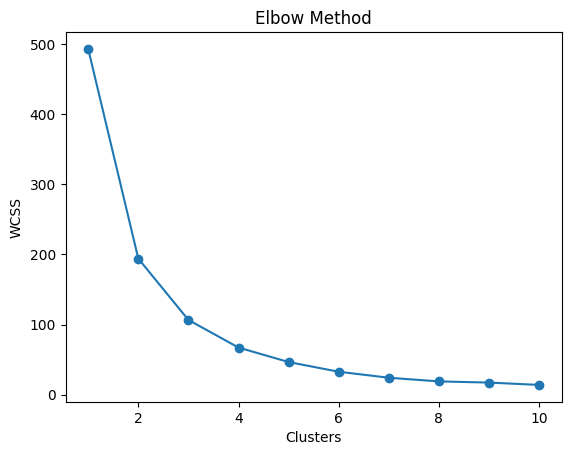

     name_of_city  effective_literacy_rate_total  Cluster
0               0                          79.86        0
1               1                          91.99        1
2               2                          80.51        0
3               3                          83.46        0
4               4                          68.38        2
..            ...                            ...      ...
488           487                          81.85        0
489           488                          84.16        0
490           489                          94.05        1
491           490                          85.91        0
492           491                          91.81        1

[493 rows x 3 columns]


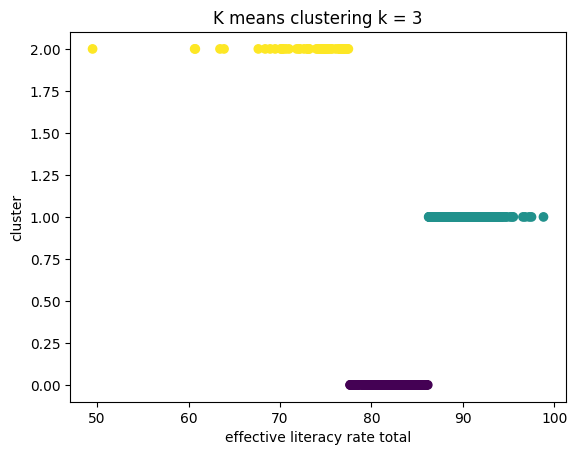

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("Cities_r2.csv")
print(df.info())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["effective_literacy_rate_total"]]

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scale)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scale)

print(df[['name_of_city', 'effective_literacy_rate_total', 'Cluster']])

plt.scatter(df['effective_literacy_rate_total'], df['Cluster'], c=df['Cluster'])
plt.title("K means clustering k = 3")
plt.xlabel("effective literacy rate total")
plt.ylabel("cluster")
plt.show()